<a href="https://colab.research.google.com/github/Skkodnikk/popakota/blob/main/%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_17_10_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('/content/Стоимость жилья в Красноярске СИ.csv')
df

,id,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
0,896,2,0,46.0,3,5,0,0,0,0,...,2,3,0,7,3,13,2,7,18,2350000.0
1,399,2,0,44.6,5,5,0,0,0,0,...,3,5,0,7,3,11,1,4,11,1799000.0
2,1515,2,0,53.0,1,9,0,1,0,0,...,4,11,0,5,3,17,3,7,15,2800000.0
3,1216,2,0,64.0,4,5,0,0,0,1,...,31,5,1,55,2,10,28,32,17,3970000.0
4,677,1,0,33.3,1,10,0,0,1,0,...,1,3,0,2,3,9,0,3,6,1880000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,357,1,0,38.0,6,9,0,0,0,0,...,2,0,0,2,0,8,0,3,5,1700000.0
804,562,3,0,46.0,4,4,1,0,0,0,...,45,8,1,19,3,13,4,10,17,2400000.0
805,407,1,0,34.0,9,16,0,0,0,0,...,0,0,0,0,1,5,1,0,3,1950000.0
806,1341,2,0,46.0,1,5,1,0,0,0,...,2,5,0,7,3,11,2,5,14,2400000.0


In [5]:
df.head()

,id,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
0,896,2,0,46.0,3,5,0,0,0,0,...,2,3,0,7,3,13,2,7,18,2350000.0
1,399,2,0,44.6,5,5,0,0,0,0,...,3,5,0,7,3,11,1,4,11,1799000.0
2,1515,2,0,53.0,1,9,0,1,0,0,...,4,11,0,5,3,17,3,7,15,2800000.0
3,1216,2,0,64.0,4,5,0,0,0,1,...,31,5,1,55,2,10,28,32,17,3970000.0
4,677,1,0,33.3,1,10,0,0,1,0,...,1,3,0,2,3,9,0,3,6,1880000.0


На основе представленной информации мы приходим к выводу, что необходимо выполнить масштабирование данных. В противном случае различия в масштабах могут привести к тому, что алгоритмы машинного обучения будут уделять большее внимание признакам с высокими значениями, в то время как более информативные, но имеющие меньшие значения, могут быть проигнорированы. Масштабирование способно значительно улучшить производительность алгоритмов машинного обучения и увеличить точность модели.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         808 non-null    int64  
 1   Количество.комнат          808 non-null    int64  
 2   Студия                     808 non-null    int64  
 3   Общая.площадь              808 non-null    float64
 4   Этаж                       808 non-null    int64  
 5   Этажей.в.доме              808 non-null    int64  
 6   Парковка                   808 non-null    int64  
 7   Без.ремонта                808 non-null    int64  
 8   Дизайнерский               808 non-null    int64  
 9   Евроремонт                 808 non-null    int64  
 10  Косметический              808 non-null    int64  
 11  Балкон                     808 non-null    int64  
 12  Лоджия                     808 non-null    int64  
 13  Совмещенный.санузел        808 non-null    int64  

- Тип данных: pandas.core.frame.DataFrame
- Количество записей: 808
- Индексы: от 0 до 807
- Общее количество столбцов: 48
Типы данных:
- Числовые (int64): 46 столбцов
- Числовые (float64): 2 столбца
- Категорирование делать не нужно.
- Использование памяти: 303.1 КБ



In [20]:
df.describe()

,id,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,...,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,8.080000e+02
mean,794.887376,2.039604,0.040842,50.781176,4.894802,8.935644,0.142327,0.101485,0.024752,0.101485,...,10.372525,4.674505,0.143564,7.788366,2.501238,13.263614,4.149752,6.754950,13.470297,2.699083e+06
std,461.218298,0.996109,0.198046,19.827507,3.760826,4.754526,0.349601,0.302157,0.155466,0.302157,...,15.397133,3.255991,0.378064,8.983450,1.636025,7.557860,5.955523,6.873569,8.068579,1.096460e+06
min,1.000000,1.000000,0.000000,10.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.990000e+05
25%,406.500000,1.000000,0.000000,37.650000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,3.000000,1.000000,8.000000,1.000000,2.000000,7.000000,1.950000e+06
50%,774.500000,2.000000,0.000000,48.000000,4.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,4.000000,0.000000,6.000000,2.000000,13.000000,3.000000,5.000000,12.000000,2.550000e+06
75%,1181.500000,3.000000,0.000000,63.075000,6.000000,10.000000,0.000000,0.000000,0.000000,0.000000,...,12.000000,7.000000,0.000000,9.000000,4.000000,18.000000,5.000000,10.000000,19.000000,3.310000e+06
max,1615.000000,5.000000,1.000000,120.000000,24.000000,26.000000,1.000000,1.000000,1.000000,1.000000,...,86.000000,14.000000,2.000000,67.000000,8.000000,42.000000,52.000000,40.000000,40.000000,6.800000e+06


- В датасете 808 записей, что соответствует количеству объектов недвижимости.
- id - это айди, для анализа он не нужен, он не на что не влияет
- Количество.комнат - стандартное отклонение(0.996109), минимум 1, максимум 5, разброса почти нет.
- Общая.площадь - стандартное отклонение(19.827507), минимум 10, максимум 120, разброс имеет место быть в сторону максимума.
- Этаж - стандартное отклонение(3.760826), минимум 1, максимум 24, разброс имеет место быть в сторону максимума.
- Этажей.в.доме - стандартное отклонение(4.754526), минимум 2, максимум 26, разброс имеет место быть в сторону максимума.
- Балкон - стандартное отклонение(0.635417), минимум 0, максимум 4, разброс небольшой в сторону максимума.
- Лоджия - стандартное отклонение(0.410904), минимум 0, максимум 2, разброс небольшой в сторону максимума.
- Совмещенный.санузел - стандартное отклонение(0.491637), минимум 0, максимум 2, разброса почти нет.  
- Раздельный.санузел - стандартное отклонение(0.512160), минимум 0, максимум 2, разброса почти нет.
- Лифт - стандартное отклонение(0.565106), минимум 0, максимум 4, разброс небольшой в сторону максимума.
- Грузовой.лифт - стандартное отклонение(0.333354), минимум 0, максимум 2, разброса почти нет.
- Год.постройки - стандартное отклонение(20.256723), минимум 1935, максимум 2018, разброс имеет место быть в сторону максимума.
- Одежда..1000 - стандартное отклонение(15.397133), минимум 0, максимум 86, разброс имеет место быть в сторону максимума.
- Супер3кет.1000 - стандартное отклонение(3.255991), минимум 0, максимум 14, разброс небольшой в сторону максимума.
- Кинотеатр.1000 - стандартное отклонение(0.378064), минимум 0, максимум 2, разброса почти нет.
- Кафе.1000 - стандартное отклонение(8.983450), минимум 0, максимум 67, разброс имеет место быть в сторону максимума.
- АЗС.1000 - стандартное отклонение(1.636025), минимум 0, максимум 8, разброс имеет место быть в сторону максимума.
- Детский.сад.1000 - стандартное отклонение(7.557860), минимум 0, максимум 42, разброс имеет место быть в сторону максимума.
- Бар.1000 - стандартное отклонение(5.955523), минимум 0, максимум 52, разброс имеет место быть в сторону максимума.
- Банк.1000 - стандартное отклонение(6.873569), минимум 0, максимум 40, разброс имеет место быть в сторону максимума.
- Аптека.1000 - стандартное отклонение(8.068579), минимум 0, максимум 40, разброс имеет место быть в сторону максимума.
- Цена - стандартное отклонение(1.096460e+06), минимум 4.990000e+05, максимум 6.800000e+06, есть разброс в сторону максимума.       
***# Нет распределения данных, следовательно нет выбрасов:***
-Студия
-Парковка
-Без.ремонта
-Дизайнерский
-Евроремонт
-Косметический
-Мусоропровод
-Аварийный
-Железобетонные.перекрытия
-Смешанные.перекрытия
-Деревянные.перекрытия
-Иные.перекрытия
-Панельные.стены
-Блочные.стены
-Деревянные.стены
-Кирпичные.стены
-Монолитные.стены
-Смешанные.стены
***Выводы:***
- В представленном датасете содержится 808 объектов недвижимости, среди которых 10% требуют ремонта, 2.4% обладают дизайнерским ремонтом, 10% оснащены евроремонтом, а 14% имеют парковку. Среднее количество комнат в этих объектах составляет 2.039, при этом средняя общая площадь равна 50.78 кв.м. Большинство из них расположены на средних этажах многоквартирных домов. Средняя стоимость объектов недвижимости составляет 2.69 миллиона рублей. Количество объектов инфраструктуры в радиусе 1000 метров от недвижимости варьируется в зависимости от типа инфраструктуры.

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'Количество.комнат'}>,
        <Axes: title={'center': 'Студия'}>,
        <Axes: title={'center': 'Общая.площадь'}>,
        <Axes: title={'center': 'Этаж'}>,
        <Axes: title={'center': 'Этажей.в.доме'}>,
        <Axes: title={'center': 'Парковка'}>],
       [<Axes: title={'center': 'Без.ремонта'}>,
        <Axes: title={'center': 'Дизайнерский'}>,
        <Axes: title={'center': 'Евроремонт'}>,
        <Axes: title={'center': 'Косметический'}>,
        <Axes: title={'center': 'Балкон'}>,
        <Axes: title={'center': 'Лоджия'}>,
        <Axes: title={'center': 'Совмещенный.санузел'}>],
       [<Axes: title={'center': 'Раздельный.санузел'}>,
        <Axes: title={'center': 'Лифт'}>,
        <Axes: title={'center': 'Грузовой.лифт'}>,
        <Axes: title={'center': 'Мусоропровод'}>,
        <Axes: title={'center': 'Год.постройки'}>,
        <Axes: title={'center': 'Аварийный'}>,
        <Axes: title={'center

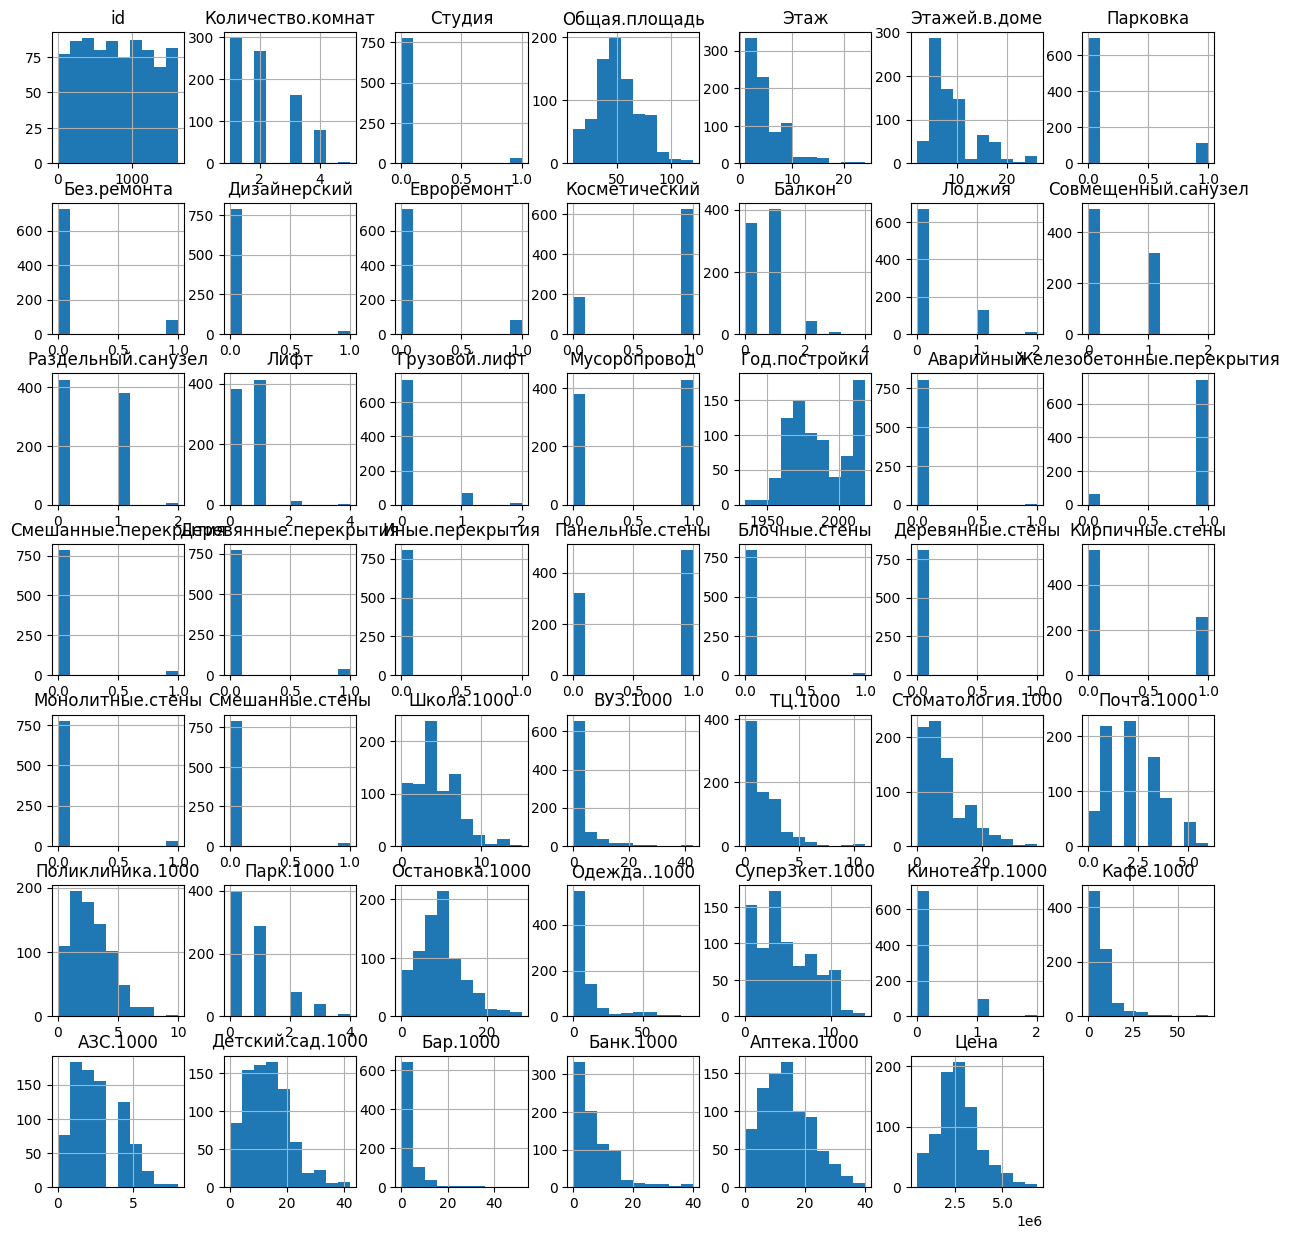

In [8]:
df.hist(figsize=(15, 15))

In [9]:
df1= df.drop('id', axis=1)
df1

,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,Косметический,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
0,2,0,46.0,3,5,0,0,0,0,1,...,2,3,0,7,3,13,2,7,18,2350000.0
1,2,0,44.6,5,5,0,0,0,0,1,...,3,5,0,7,3,11,1,4,11,1799000.0
2,2,0,53.0,1,9,0,1,0,0,0,...,4,11,0,5,3,17,3,7,15,2800000.0
3,2,0,64.0,4,5,0,0,0,1,0,...,31,5,1,55,2,10,28,32,17,3970000.0
4,1,0,33.3,1,10,0,0,1,0,0,...,1,3,0,2,3,9,0,3,6,1880000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,1,0,38.0,6,9,0,0,0,0,1,...,2,0,0,2,0,8,0,3,5,1700000.0
804,3,0,46.0,4,4,1,0,0,0,1,...,45,8,1,19,3,13,4,10,17,2400000.0
805,1,0,34.0,9,16,0,0,0,0,1,...,0,0,0,0,1,5,1,0,3,1950000.0
806,2,0,46.0,1,5,1,0,0,0,1,...,2,5,0,7,3,11,2,5,14,2400000.0


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Количество.комнат          808 non-null    int64  
 1   Студия                     808 non-null    int64  
 2   Общая.площадь              808 non-null    float64
 3   Этаж                       808 non-null    int64  
 4   Этажей.в.доме              808 non-null    int64  
 5   Парковка                   808 non-null    int64  
 6   Без.ремонта                808 non-null    int64  
 7   Дизайнерский               808 non-null    int64  
 8   Евроремонт                 808 non-null    int64  
 9   Косметический              808 non-null    int64  
 10  Балкон                     808 non-null    int64  
 11  Лоджия                     808 non-null    int64  
 12  Совмещенный.санузел        808 non-null    int64  
 13  Раздельный.санузел         808 non-null    int64  

Удалили столбец "id" и сохранили изменение.

In [11]:
df.isnull().sum().max()

0

Как видно из функции, в таблице нет пустых значений.

In [12]:
X = df1.drop('Цена', axis=1)
Y = df1['Цена']

В данном случае удалили столбец "Цена" для более простого маштабирования данных.

In [13]:
X.info()
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Количество.комнат          808 non-null    int64  
 1   Студия                     808 non-null    int64  
 2   Общая.площадь              808 non-null    float64
 3   Этаж                       808 non-null    int64  
 4   Этажей.в.доме              808 non-null    int64  
 5   Парковка                   808 non-null    int64  
 6   Без.ремонта                808 non-null    int64  
 7   Дизайнерский               808 non-null    int64  
 8   Евроремонт                 808 non-null    int64  
 9   Косметический              808 non-null    int64  
 10  Балкон                     808 non-null    int64  
 11  Лоджия                     808 non-null    int64  
 12  Совмещенный.санузел        808 non-null    int64  
 13  Раздельный.санузел         808 non-null    int64  

In [14]:
X_train = X[0::1]
Y_train = Y[0::1]
X_test = X[0::1]
Y_test = Y[0::1]

In [22]:
scaler = StandardScaler(). fit(X_train)
std = scaler. transform(X_train)

Произвели масштабирование данных с применением стандартизации.

In [23]:
model = LinearRegression ()
model. fit(X_train, Y_train)

LinearRegression()

In [24]:
Y_train_pred = model. predict(X_train)
Y_test_pred = model. predict(X_test)
mse_test = mean_squared_error(Y_test, Y_test_pred)
mae_test = mean_absolute_error (Y_test, Y_test_pred)
mse_train = mean_squared_error(Y_train, Y_train_pred)
mae_train = mean_absolute_error(Y_train, Y_train_pred)

In [25]:
print( 'Test MSE для линейной регрессии: ', mse_test)
print( 'Test MAE для линейной регрессии: ', mae_test)
print( 'Train MSE для линейной регрессии: ', mse_train)
print( 'Train MAE для линейной регрессии: ', mae_train)

Test MSE для линейной регрессии:  83481480911.70071
Test MAE для линейной регрессии:  220540.7569487763
Train MSE для линейной регрессии:  83481480911.70071
Train MAE для линейной регрессии:  220540.7569487763


In [26]:
from sklearn.tree import DecisionTreeRegressor

model_dtr = DecisionTreeRegressor()
model_dtr. fit(X_train, Y_train)
Y_train_pred_dtr = model_dtr.predict(X_train)
Y_test_pred_dtr = model_dtr.predict(X_test)
mse_test_dtr = mean_squared_error(Y_test, Y_test_pred_dtr)
mae_test_dtr = mean_absolute_error(Y_test, Y_test_pred_dtr)
mse_train_dtr = mean_squared_error (Y_train, Y_train_pred_dtr)
mae_train_dtr = mean_absolute_error(Y_train, Y_train_pred_dtr)

In [27]:
print( 'Test MSE для дерева решений:', mse_test_dtr)
print( 'Test MAE для дерева решений:', mae_test_dtr)
print( 'Train MSE для дерева решений:', mse_train_dtr)
print( 'Train MAE для дерева решений:', mae_train_dtr)

Test MSE для дерева решений: 96472772.27722773
Test MAE для дерева решений: 804.4554455445544
Train MSE для дерева решений: 96472772.27722773
Train MAE для дерева решений: 804.4554455445544


In [28]:
from sklearn.ensemble import RandomForestRegressor
model_rfr = RandomForestRegressor()
model_rfr. fit(X_train, Y_train)
Y_test_pred_rfr = model_rfr. predict(X_test)
Y_train_pred_rfr = model_rfr.predict(X_train)
mse_test_rfr = mean_squared_error(Y_test, Y_test_pred_rfr)
mae_test_rfr = mean_absolute_error (Y_test, Y_test_pred_rfr)
mse_train_rfr = mean_squared_error(Y_train, Y_train_pred_rfr)
mae_train_rfr = mean_absolute_error(Y_train, Y_train_pred_rfr)

In [29]:
print( 'Test MSE для случайного леса:', mse_test_rfr)
print( 'Test MAE для случайного леса:', mae_test_rfr)
print( 'Train MSE для случайного леса: ', mse_train_rfr)
print('Train MAE для случайного леса:', mae_train_rfr)

Test MSE для случайного леса: 11928854162.2301
Test MAE для случайного леса: 79463.58255893446
Train MSE для случайного леса:  11928854162.2301
Train MAE для случайного леса: 79463.58255893446


In [31]:
tbl = pd.DataFrame({
    'Метод': ['Линейная регрессия', 'Дерево решений', 'Случайный лес'],
    'Test MSE': [mse_test, mse_test_dtr, mse_test_rfr],
    'Test MAE': [mae_test, mae_test_dtr, mae_test_rfr],
    'Train MSE': [mse_train, mse_train_dtr, mse_train_rfr],
    'Train MAE': [mae_train, mae_train_dtr, mae_train_rfr]
})
tbl

,Метод,Test MSE,Test MAE,Train MSE,Train MAE
0,Линейная регрессия,8.348148e+10,220540.756949,8.348148e+10,220540.756949
1,Дерево решений,9.647277e+07,804.455446,9.647277e+07,804.455446
2,Случайный лес,1.192885e+10,79463.582559,1.192885e+10,79463.582559


**Вывод:**

**Сравнение моделей по точности:**
- Линейная регрессия: демонстрирует наихудшие результаты на тестовой и тренировочной выборках по метрикам MSE и MAE. Это говорит о том, что модель плохо подходит для данных и переобучается.
- Дерево решений: оказывает значительно лучшие результаты, чем линейная регрессия, как на тестовой, так и на тренировочной выборках.
- Случайный лес: показывает результаты, близкие к дереву решений, но несколько хуже.

**Переобучение:**
- Линейная регрессия демонстрирует сильное переобучение - одинаковые значения MSE и МАЕ на тестовой и тренировочной выборках.
- Дерево решений и случайный лес не переобучаются, MSE и МАЕ на тестовой и тренировочной выборках примерно одинаковы.

**Выбор лучшей модели:**
Исходя из полученных результатов, дерево решений является наиболее подходящей моделью для данных, так как демонстрирует высокую точность и не переобучается.
